In [10]:
import os
import pandas as pd
import datetime
import collections 
import matplotlib.pyplot as plt
import numpy as np
import copy
import collections
import re



os.chdir('C:/Users/tjame/Documents/Curious Learning')

#March 11 data of English App
gPlay= pd.read_csv("GamePlay.csv").drop_duplicates()

#entire month of march data for multiple languages
brazil = pd.read_csv('brazil portuguese march.csv').drop_duplicates()
spanish = pd.read_csv('spanish march.csv').drop_duplicates()
afrikaans = pd.read_csv('afrikaans march.csv').drop_duplicates()
zulu = pd.read_csv('zulu march.csv').drop_duplicates()
english = pd.read_csv('english march.csv').drop_duplicates()
indian = pd.read_csv('indian english march.csv').drop_duplicates()
hausa = pd.read_csv('hausa march.csv').drop_duplicates()
hindi = pd.read_csv('hindi march.csv').drop_duplicates()
australian = pd.read_csv('australian march.csv').drop_duplicates()
turkish = pd.read_csv('turkish march.csv').drop_duplicates()
french = pd.read_csv('french march.csv').drop_duplicates()

In [12]:
#This method finds the difference in seconds between two unix timestamps
def date_diff_in_seconds(time1, time2):
    d1 = datetime.datetime.fromtimestamp(time1/1000000)
    d2 = datetime.datetime.fromtimestamp(time2/1000000)
    
    delta = abs((d2 - d1).seconds)
  
    return delta

In [3]:
###################single day of March 11 for english App

In [4]:
uniqueUsers = []
count=0 
while(count<len(gPlay)):
    currentUser = gPlay.iloc[count][0]
    if currentUser not in uniqueUsers:
        uniqueUsers.append(gPlay.iloc[count][0])
    count=count+1

#each user key will have 3 values: level, success/fail, time to succeed/fail level in seconds
usersData =dict()

for i in uniqueUsers:
    usersData[i]=dict()
    count = 0
    startLevel = False
    
    while(count<len(gPlay)):
        if(gPlay.iloc[count][0]==i):
            if(not startLevel):
                if(gPlay.iloc[count][2][:12]=='SegmentStart'):
                    time1=gPlay.iloc[count][3]
                    startLevel = True
                    endLevel = False
                    count=count+3
                else:
                    count=count+3
                
            else:   
                if(gPlay.iloc[count][2][0:12]=='LevelSuccess'):
                    time2=gPlay.iloc[count][3]
                    sf = (gPlay.iloc[count][2].split("_",1)[0]).split("Level",1)[1]
                    startLevel = False
                    endLevel = True
                if(gPlay.iloc[count][2][0:9]=='LevelFail'):
                    time2=gPlay.iloc[count][3] 
                    sf = (gPlay.iloc[count][2].split("_",1)[0]).split("Level",1)[1]
                    startLevel = False
                    endLevel = True
                    
                if(endLevel):   
                    time = date_diff_in_seconds(time1, time2)
                    level = 'Level ' + gPlay.iloc[count][2].split("_",1)[1]
                    usersData[i][level]=[]
                    usersData[i][level].append(time)
                    usersData[i][level].append(sf)
                
                count=count+3
        else:
            count=count+3
       
        
levels = dict()
for i in usersData:
    for j in usersData[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levels):
            levels[lvl] =0
            for k in usersData[i][j]:
                if(type(k)==int):
                    if(k<3000):
                        levels[lvl] = levels[lvl] + k
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in usersData[i][j]:
                if(type(k)==int):
                    if(k<3000):
                        levels[lvl] = levels[lvl] + k

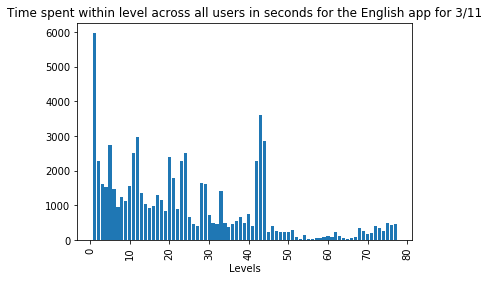

In [5]:
#sort dictionary by keys
od = collections.OrderedDict(sorted(levels.items()))

plt.bar(od.keys(), od.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent within level across all users in seconds for the English app for 3/11")
plt.xlabel("Levels")
plt.show()

users = dict()
for i in uniqueUsers:
    users[i] =0
    for j in usersData[i]: 
        users[i] = users[i] + usersData[i][j][0]

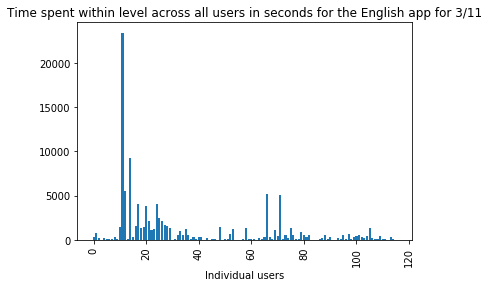

In [6]:
#change user keys so that the names are numbers
id = [i for i in range(len(users))]

plt.bar(id, users.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent within level across all users in seconds for the English app for 3/11")
plt.xlabel("Individual users")
plt.show()

In [7]:
################## Multiple languages for whole month of March

In [13]:
###improved method to take the data and resulting user dictionary for the language for any length of time and fill the dictionary with each user's 
###levels completed, success or failure at the level, time taken to complete level in seconds, and country of user
def engagementData(lang, langDict):
    count = 0
    time = 0
    time1 = 0
    time2 =0
    levelTime = 0
    while(count<len(lang)):
        
        i = lang.iloc[count][0]
        
        if(i not in langDict):
            langDict[i]=dict()
    
        if(lang.iloc[count][2][:12]=='SegmentStart'):
            if(count == 0):
                time1=lang.iloc[count][3]
                count=count+2
            else:
                if(lang.iloc[count-2][2][:13] == 'SelectMonster' or lang.iloc[count-2][2][:5] == 'Level'):
                    time1 = lang.iloc[count][3]
                    count=count+2
                else:
                    if(lang.iloc[count][2].split("_",1)[1] == lang.iloc[count-2][2].split("_",1)[1] ):
                        time1=lang.iloc[count][3]
                        count=count+2
                    else:
                        levelTime = 0
                        time1=lang.iloc[count][3]
                        count=count+2           
                        
            
        elif(lang.iloc[count][2][:14]=='SegmentSuccess' or lang.iloc[count][2][0:11]=='SegmentFail'):
            time2=lang.iloc[count][3]
            time = date_diff_in_seconds(time1, time2)
            if(time<300):
                levelTime = levelTime + time        
            count=count+2
            
        elif(lang.iloc[count][2][:12]=='LevelSuccess' or lang.iloc[count][2][:9]=='LevelFail'):            
            level = 'Level ' + lang.iloc[count][2].split("_",1)[1]
            sf = (lang.iloc[count][2].split("_",1)[0]).split("Level",1)[1]
            country = lang.iloc[count][4]         
            
            if(level in langDict[i]):
                levelTime = 0
            else:
                date = datetime.datetime.fromtimestamp(time2/1000000).strftime('%m/%d/%Y-%A')
                langDict[i][level] = [] 
                langDict[i][level].append(levelTime)
                langDict[i][level].append(sf)
                langDict[i][level].append(date)
                langDict[i][level].append(country)
        
                levelTime = 0
            
            count=count+2

        else:
            count = count+2

In [14]:
englishMarch = dict()
engagementData(english, englishMarch)

totalTimeEnglish = 0 

for i in englishMarch:
    for j in englishMarch[i]:
        totalTimeEnglish = totalTimeEnglish + englishMarch[i][j][0]
        
hoursEnglish = totalTimeEnglish/(60*60)


spanishMarch = dict()
engagementData(spanish, spanishMarch)

totalTimeSpanish = 0 

for i in spanishMarch:
    for j in spanishMarch[i]:
        totalTimeSpanish = totalTimeSpanish + spanishMarch[i][j][0]
        
hoursSpanish = totalTimeSpanish/(60*60)


brazilMarch = dict()
engagementData(brazil, brazilMarch)

totalTimeBrazil = 0 

for i in brazilMarch:
    for j in brazilMarch[i]:
        totalTimeBrazil = totalTimeBrazil + brazilMarch[i][j][0]
        
hoursBrazil = totalTimeBrazil/(60*60)

afrikaansMarch = dict()
engagementData(afrikaans, afrikaansMarch)

totalTimeAfrikaans = 0 

for i in afrikaansMarch:
    for j in afrikaansMarch[i]:
        totalTimeAfrikaans = totalTimeAfrikaans + afrikaansMarch[i][j][0]
        
hoursAfrikaans = totalTimeAfrikaans/(60*60)


zuluMarch = dict()
engagementData(zulu, zuluMarch)

        
totalTimeZulu = 0 

for i in zuluMarch:
    for j in zuluMarch[i]:
        totalTimeZulu = totalTimeZulu + zuluMarch[i][j][0]
        
hoursZulu = totalTimeZulu/(60*60)


###
indianMarch = dict()
engagementData(indian, indianMarch)    
totalTimeIndian = 0 
for i in indianMarch:
    for j in indianMarch[i]:
        totalTimeIndian = totalTimeIndian + indianMarch[i][j][0]   
hoursIndian = totalTimeIndian/(60*60)


hausaMarch = dict()
engagementData(hausa, hausaMarch)    
totalTimeHausa = 0 
for i in hausaMarch:
    for j in hausaMarch[i]:
        totalTimeHausa = totalTimeHausa + hausaMarch[i][j][0]
hoursHausa = totalTimeHausa/(60*60)


hindiMarch = dict()
engagementData(hindi, hindiMarch)
totalTimeHindi = 0 
for i in hindiMarch:
    for j in hindiMarch[i]:
        totalTimeHindi = totalTimeHindi + hindiMarch[i][j][0]
hoursHindi  = totalTimeHindi/(60*60)

turkishMarch = dict()
engagementData(turkish, turkishMarch)
totalTimeTurkish = 0 
for i in turkishMarch:
    for j in turkishMarch[i]:
        totalTimeTurkish = totalTimeTurkish + turkishMarch[i][j][0]
        
hoursTurkish = totalTimeTurkish/(60*60)

frenchMarch = dict()
engagementData(french, frenchMarch)
totalTimeFrench = 0 
for i in frenchMarch:
    for j in frenchMarch[i]:
        totalTimeFrench = totalTimeFrench + frenchMarch[i][j][0]
        
hoursFrench = totalTimeFrench/(60*60)



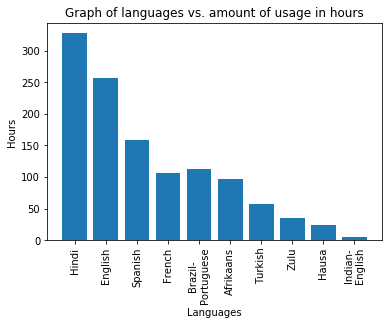

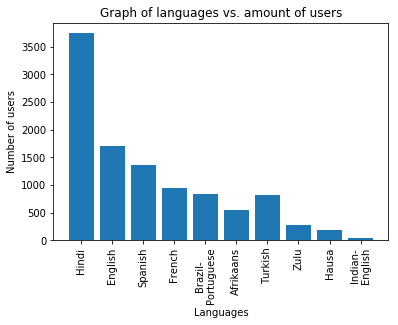

In [15]:
#######################################
####All languages analysis 

##hours per language and users per language
languages = ['Hindi', 'English', 'Spanish', 'French','Brazil-\nPortuguese', 'Afrikaans',  'Turkish', 'Zulu', 'Hausa', 'Indian-\nEnglish']
languagesHours = [hoursHindi, hoursEnglish, hoursSpanish, hoursFrench, hoursBrazil, hoursAfrikaans, hoursTurkish, hoursZulu, hoursHausa, hoursIndian]

plt.bar(languages, languagesHours)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Graph of languages vs. amount of usage in hours")
plt.xlabel("Languages")
plt.ylabel("Hours")
plt.show()

languagesUsers = [len(hindiMarch), len(englishMarch), len(spanishMarch), len(frenchMarch),len(brazilMarch), len(afrikaansMarch), len(turkishMarch), len(zuluMarch), len(hausaMarch), len(indianMarch)]
plt.bar(languages, languagesUsers)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Graph of languages vs. amount of users")
plt.xlabel("Languages")
plt.ylabel("Number of users")
plt.show()


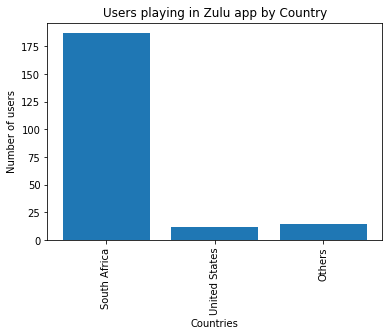

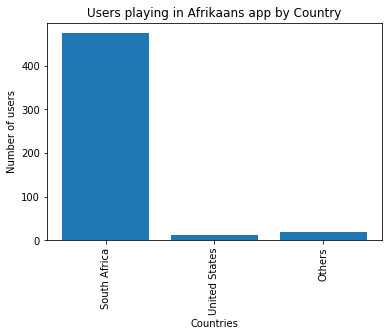

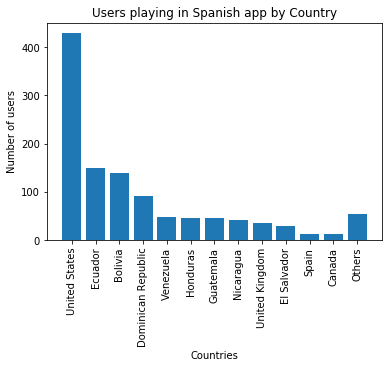

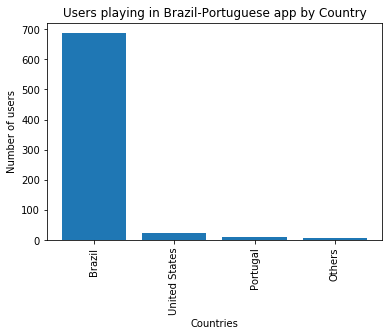

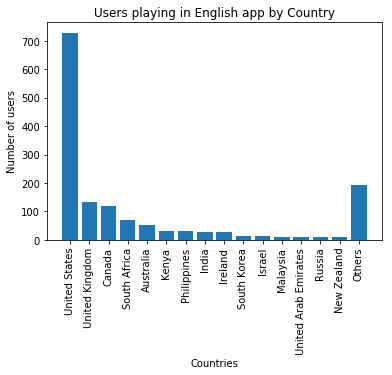

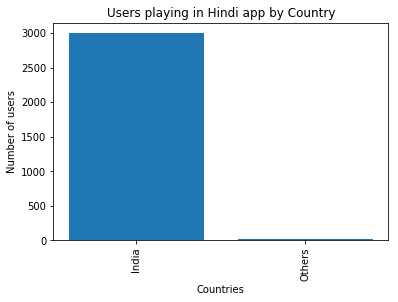

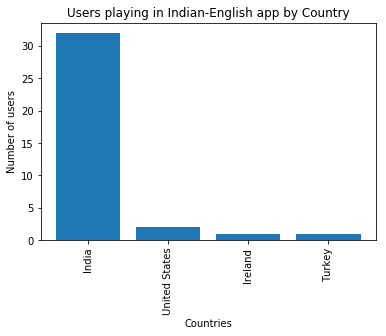

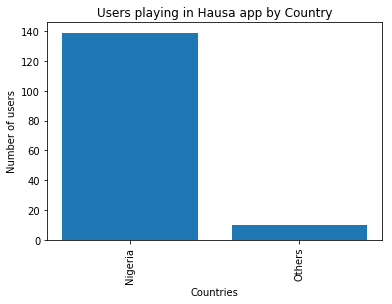

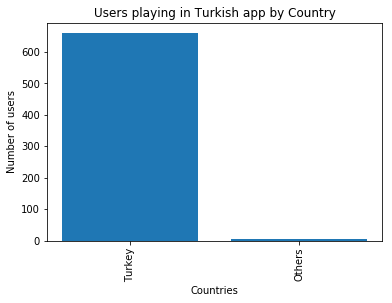

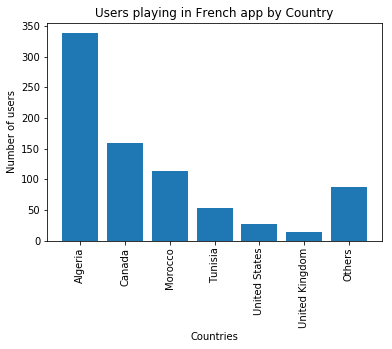

In [59]:
###usage by country - all countries with less than 10 users will be folded into the "Others" category

zuluCountries = dict()

for i in zuluMarch:
    if(zuluMarch[i]):
        country = list(zuluMarch[i].values())[0][3]
        
        if(country not in zuluCountries):
            zuluCountries[country] = 0
            zuluCountries[country] = zuluCountries[country] + 1
        else:
            zuluCountries[country] = zuluCountries[country] + 1
delete = []
zuluOthers = 0
for i in zuluCountries:
    if(zuluCountries[i]<10):
        zuluOthers = zuluOthers + zuluCountries[i]
        delete.append(i)

for key in delete: del zuluCountries[key] 
            
sortedZulu = sorted(zuluCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedZulu = collections.OrderedDict(sortedZulu)
sortedZulu['Others'] = zuluOthers        




afrikaansCountries = dict()

for i in afrikaansMarch:
    if(afrikaansMarch[i]):
        country = list(afrikaansMarch[i].values())[0][3]
        
        if(country not in afrikaansCountries):
            afrikaansCountries[country] = 0
            afrikaansCountries[country] = afrikaansCountries[country] + 1
        else:
            afrikaansCountries[country] = afrikaansCountries[country] + 1   
delete = []
afriOthers = 0
for i in afrikaansCountries:
    if(afrikaansCountries[i]<10):
        afriOthers = afriOthers + afrikaansCountries[i]
        delete.append(i)
for key in delete: del afrikaansCountries[key] 
         
sortedAfri = sorted(afrikaansCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedAfri = collections.OrderedDict(sortedAfri)
sortedAfri['Others'] = afriOthers       
            



spanishCountries = dict()
for i in spanishMarch:
    if(spanishMarch[i]):
        country = list(spanishMarch[i].values())[0][3]
        
        if(country not in spanishCountries):
            spanishCountries[country] = 0
            spanishCountries[country] = spanishCountries[country] + 1
        else:
            spanishCountries[country] = spanishCountries[country] + 1       
delete = []
spanishOthers = 0
for i in spanishCountries:
    if(spanishCountries[i]<10):
        spanishOthers = spanishOthers + spanishCountries[i]
        delete.append(i)
for key in delete: del spanishCountries[key] 
             
sortedSpanish = sorted(spanishCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedSpanish = collections.OrderedDict(sortedSpanish)
sortedSpanish['Others'] = spanishOthers       
            
            
            
            
brazilCountries = dict()
for i in brazilMarch:
    if(brazilMarch[i]):
        country = list(brazilMarch[i].values())[0][3]
        
        if(country not in brazilCountries):
            brazilCountries[country] = 0
            brazilCountries[country] = brazilCountries[country] + 1
        else:
            brazilCountries[country] = brazilCountries[country] + 1        
delete = []
brazilOthers = 0
for i in brazilCountries:
    if(brazilCountries[i]<10):
        brazilOthers = brazilOthers + brazilCountries[i]
        delete.append(i)
for key in delete: del brazilCountries[key] 
          
sortedBrazil = sorted(brazilCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedBrazil = collections.OrderedDict(sortedBrazil)
sortedBrazil['Others'] = brazilOthers                
            
            
            

englishCountries = dict()
for i in englishMarch:
    if(englishMarch[i]):
        country = list(englishMarch[i].values())[0][3]
        
        if(country not in englishCountries):
            englishCountries[country] = 0
            englishCountries[country] = englishCountries[country] + 1
        else:
            englishCountries[country] = englishCountries[country] + 1
delete = []
englishOthers = 0
for i in englishCountries:
    if(englishCountries[i]<10):
        englishOthers = englishOthers + englishCountries[i]
        delete.append(i)
for key in delete: del englishCountries[key] 
        
sortedEnglish = sorted(englishCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedEnglish = collections.OrderedDict(sortedEnglish)
sortedEnglish['Others'] = englishOthers             
            





hindiCountries = dict()

for i in hindiMarch:
    if(hindiMarch[i]):
        country = list(hindiMarch[i].values())[0][3]
        
        if(country not in hindiCountries):
            hindiCountries[country] = 0
            hindiCountries[country] = hindiCountries[country] + 1
        else:
            hindiCountries[country] = hindiCountries[country] + 1
delete = []
hindiOthers = 0
for i in hindiCountries:
    if(hindiCountries[i]<10):
        hindiOthers = hindiOthers + hindiCountries[i]
        delete.append(i)

for key in delete: del hindiCountries[key] 
            
sortedHindi = sorted(hindiCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedHindi = collections.OrderedDict(sortedHindi)
sortedHindi['Others'] = hindiOthers        




hausaCountries = dict()

for i in hausaMarch:
    if(hausaMarch[i]):
        country = list(hausaMarch[i].values())[0][3]
        
        if(country not in hausaCountries):
            hausaCountries[country] = 0
            hausaCountries[country] = hausaCountries[country] + 1
        else:
            hausaCountries[country] = hausaCountries[country] + 1   
delete = []
hausaOthers = 0
for i in hausaCountries:
    if(hausaCountries[i]<10):
        hausaOthers = hausaOthers + hausaCountries[i]
        delete.append(i)
for key in delete: del hausaCountries[key] 
         
sortedHausa = sorted(hausaCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedHausa = collections.OrderedDict(sortedHausa)
sortedHausa['Others'] = hausaOthers       
            



indianCountries = dict()
for i in indianMarch:
    if(indianMarch[i]):
        country = list(indianMarch[i].values())[0][3]
        
        if(country not in indianCountries):
            indianCountries[country] = 0
            indianCountries[country] = indianCountries[country] + 1
        else:
            indianCountries[country] = indianCountries[country] + 1  
            

             
sortedIndian = sorted(indianCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedIndian = collections.OrderedDict(sortedIndian)
            
            
            
            
turkishCountries = dict()
for i in turkishMarch:
    if(turkishMarch[i]):
        country = list(turkishMarch[i].values())[0][3]
        
        if(country not in turkishCountries):
            turkishCountries[country] = 0
            turkishCountries[country] = turkishCountries[country] + 1
        else:
            turkishCountries[country] = turkishCountries[country] + 1        
delete = []
turkishOthers = 0
for i in turkishCountries:
    if(turkishCountries[i]<10):
        turkishOthers = turkishOthers + turkishCountries[i]
        delete.append(i)
for key in delete: del turkishCountries[key] 
          
sortedTurkish = sorted(turkishCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedTurkish = collections.OrderedDict(sortedTurkish)
sortedTurkish['Others'] = turkishOthers                
            
            
            

frenchCountries = dict()
for i in frenchMarch:
    if(frenchMarch[i]):
        country = list(frenchMarch[i].values())[0][3]
        
        if(country not in frenchCountries):
            frenchCountries[country] = 0
            frenchCountries[country] = frenchCountries[country] + 1
        else:
            frenchCountries[country] = frenchCountries[country] + 1
delete = []
frenchOthers = 0
for i in frenchCountries:
    if(frenchCountries[i]<10):
        frenchOthers = frenchOthers + frenchCountries[i]
        delete.append(i)
for key in delete: del frenchCountries[key] 
        
sortedFrench = sorted(frenchCountries.items(), key=lambda kv: kv[1], reverse = True)
sortedFrench = collections.OrderedDict(sortedFrench)
sortedFrench['Others'] = frenchOthers    



            
#graphs of usage by country

plt.bar(sortedZulu.keys(), sortedZulu.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Zulu app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

plt.bar(sortedAfri.keys(), sortedAfri.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Afrikaans app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()


plt.bar(sortedSpanish.keys(), sortedSpanish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Spanish app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

plt.bar(sortedBrazil.keys(), sortedBrazil.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Brazil-Portuguese app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()


plt.bar(sortedEnglish.keys(), sortedEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in English app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

plt.bar(sortedHindi.keys(), sortedHindi.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Hindi app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

plt.bar(sortedIndian.keys(), sortedIndian.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Indian-English app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()


plt.bar(sortedHausa.keys(), sortedHausa.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Hausa app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

plt.bar(sortedTurkish.keys(), sortedTurkish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in Turkish app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()


plt.bar(sortedFrench.keys(), sortedFrench.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Users playing in French app by Country")
plt.xlabel("Countries")
plt.ylabel("Number of users")
plt.show()

In [26]:
###method for determining engagers and learners in each language's user dictionary. An engager is a user who has completed
###at least level 5. A learner is a user who has completed at least level 10.
def engagersDict(langDict):
    engager = False
    engagers = dict()
    for i in langDict:
        if (langDict[i]):
            lvls = []
            for j in langDict[i]:
                lvl = int(float(re.sub('[^0-9]','', j)))
                if(langDict[i][j][1] == 'Success'):
                    lvls.append(lvl)
            for k in lvls:
                if (k>=5):
                    engager = True
            if(engager):
                engagers[i] = copy.deepcopy(langDict[i])
                engager = False
    
    return engagers

def learnersDict(langDict):
    learner = False
    learners = dict()
    for i in langDict:
        if (langDict[i]):
            lvls = []
            for j in langDict[i]:
                lvl = int(float(re.sub('[^0-9]','', j)))
                if(langDict[i][j][1] == 'Success'):
                    lvls.append(lvl)
            for k in lvls:
                if (k >= 10):
                    learner = True
            if(learner):
                learners[i] = copy.deepcopy(langDict[i])
                learner = False
    return learners

engagEnglish = engagersDict(englishMarch)
learnEnglish = learnersDict(englishMarch)

engagHindi = engagersDict(hindiMarch)
learnHindi = learnersDict(hindiMarch)

engagSpanish = engagersDict(spanishMarch)
learnSpanish = learnersDict(spanishMarch)

engagBrazil = engagersDict(brazilMarch)
learnBrazil = learnersDict(brazilMarch)

engagAfrikaans = engagersDict(afrikaansMarch)
learnAfrikaans = learnersDict(afrikaansMarch)

engagZulu = engagersDict(zuluMarch)
learnZulu = learnersDict(zuluMarch)

engagIndian = engagersDict(indianMarch)
learnIndian = learnersDict(indianMarch)

engagHausa = engagersDict(hausaMarch)
learnHausa = learnersDict(hausaMarch)

engagTurkish = engagersDict(turkishMarch)
learnTurkish = learnersDict(turkishMarch)

engagFrench = engagersDict(frenchMarch)
learnFrench = learnersDict(frenchMarch)

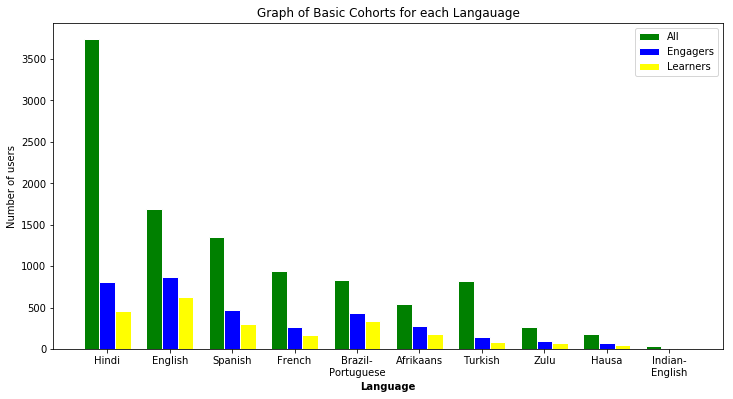

In [28]:
###graph of basic cohorts- all users, engagers, and learners

languagesEngagers = [len(engagHindi),len(engagEnglish), len(engagSpanish),len(engagFrench), len(engagBrazil), 
len(engagAfrikaans), len(engagTurkish), len(engagZulu),len(engagHausa),len(engagIndian)]

languagesLearners = [len(learnHindi),len(learnEnglish), len(learnSpanish),len(learnFrench), len(learnBrazil), 
len(learnAfrikaans), len(learnTurkish), len(learnZulu),len(learnHausa),len(learnIndian)]


barWidth = 0.25
r1 = np.arange(len(languagesUsers))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111)
bar_width = 0.35
ax.bar(r1, languagesUsers, color='green', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, languagesEngagers, color='blue', width=barWidth, edgecolor='white', label='var1')
ax.bar(r3, languagesLearners, color='yellow', width=barWidth, edgecolor='white', label='var1')

plt.xlabel('Language', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(languagesUsers))], languages)
plt.ylabel("Number of users")
plt.legend(('All', 'Engagers', 'Learners'))
plt.title('Graph of Basic Cohorts for each Langauage')
plt.show()



In [29]:
###determining linear levels method - users who have gone through the game in a linear path, without going to previous levels
def linearLevels(langDct):
    linear = dict()
    for i in langDct:
        if(len(langDct[i]) ==1):
           pass
        else:
            l = []
            for j in langDct[i]:
                l.append(int(j.split(" ",1)[1]))
            if(l):
                if(l == list(range(min(l), max(l)+1))):
                    linear[i] = copy.deepcopy(langDct[i])
    return linear

###non-linear users users who have gone back to previously completed levels
def nonLinearLevels(linear, langDct):
    nonLinear = dict()
    for i in langDct:
        if(i not in linear and len(langDct[i])>1):
            nonLinear[i] = copy.deepcopy(langDct[i])
    return nonLinear


linearEnglish = linearLevels(englishMarch)
nonLinearEnglish = nonLinearLevels(linearEnglish, englishMarch)

linearSpanish = linearLevels(spanishMarch)
nonLinearSpanish = nonLinearLevels(linearSpanish, spanishMarch)

linearHindi = linearLevels(hindiMarch)
nonLinearHindi = nonLinearLevels(linearHindi, hindiMarch)

In [60]:
#######################################
####English analysis 

#mean time per user
#median time per user
#max time per user

totTimeEnglish = dict()
count = 1
for i in englishMarch:
    totTimeEnglish[count] = 0
    for j in englishMarch[i]:
        for k in englishMarch[i][j]:
            if(type(k)==int):
                    totTimeEnglish[count] = totTimeEnglish[count] + k
    count = count +1
    
sorted_totTimeEnglish = sorted(totTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
totTimeEnglish = collections.OrderedDict(sorted_totTimeEnglish)

print("Mean time spent in minutes is: " + str(np.mean(list(totTimeEnglish.values()))/60))
print("Median time spent in minutes is: " + str(np.median(list(totTimeEnglish.values()))/60))
print("Max time spent in minutes is: " + str(max(totTimeEnglish.values())/(60)))


#mean levels completed
#median levels completed
#max levels completed

levelsEnglish = dict()
for i in englishMarch:
    levelsEnglish[i] = len(englishMarch[i])
levelsEnglish = sorted(levelsEnglish.items(), key=lambda kv: kv[1], reverse = True)
levelsEnglish =collections.OrderedDict(levelsEnglish)

print("Mean levels completed is: " + str(np.mean(list(levelsEnglish.values()))))
print("Median levels completed is: " + str(np.median(list(levelsEnglish.values()))))
print("Max levels completed is: " + str(max(levelsEnglish.values())))


Mean time spent in minutes is: 9.072999016715832
Median time spent in minutes is: 3.5
Max time spent in minutes is: 101.41666666666667
Mean levels completed is: 8.846017699115045
Median levels completed is: 3.0
Max levels completed is: 77


In [31]:
##################### English Engager Analysis

### resilient engagers are engagers who have failed at least once before level 5 or have spent twice the average time 
###of completing 5 levels (avg time per level ~ 60 seconds, therefore avg time completing 5 levels is 300 seconds)
resEngagEnglish = dict()
for i in engagEnglish:
    totTime = 0
    fail = False
    count = 0 
    
    for j in engagEnglish[i]:
        if(count<5):
            totTime += engagEnglish[i][j][0]
            if(engagEnglish[i][j][1] == 'Fail'):
                fail = True
        count += 1
        
    if(totTime>600 or fail):
        resEngagEnglish[i] = copy.deepcopy(engagEnglish[i])
        


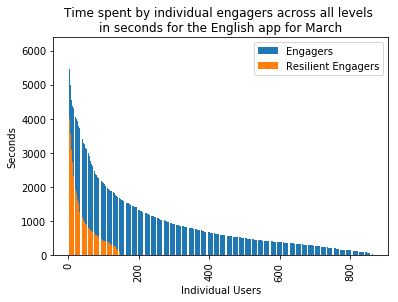

In [32]:
##total time per user graph
        
engagTimeEnglish = dict()
count = 1
for i in engagEnglish:
    engagTimeEnglish[count] = 0
    for j in engagEnglish[i]:
        for k in engagEnglish[i][j]:
            if(type(k)==int):
                    engagTimeEnglish[count] = engagTimeEnglish[count] + k
    count = count +1
    
sorted_engagTimeEnglish = sorted(engagTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
engagTimeEnglish = collections.OrderedDict(sorted_engagTimeEnglish)

engagCountEnglish = []
count = 0
while(count<len(engagEnglish)):
    engagCountEnglish.append(count+1)
    count = count+1
    
resEngagTimeEnglish = dict()
count = 1
for i in resEngagEnglish:
    resEngagTimeEnglish[count] = 0
    for j in resEngagEnglish[i]:
        for k in resEngagEnglish[i][j]:
            if(type(k)==int):
                    resEngagTimeEnglish[count] = resEngagTimeEnglish[count] + k
    count = count +1
    
sorted_resEngagTimeEnglish = sorted(resEngagTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
resEngagTimeEnglish = collections.OrderedDict(sorted_resEngagTimeEnglish)

resEngagCountEnglish = []
count = 0
while(count<len(resEngagEnglish)):
    resEngagCountEnglish.append(count+1)
    count = count+1

plt.bar(engagCountEnglish, engagTimeEnglish.values())
plt.bar(resEngagCountEnglish, resEngagTimeEnglish.values())
plt.title("Time spent by individual engagers across all levels \nin seconds for the English app for March")
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel("Individual Users")
plt.ylabel("Seconds")
plt.legend(['Engagers', 'Resilient Engagers'])
plt.show()

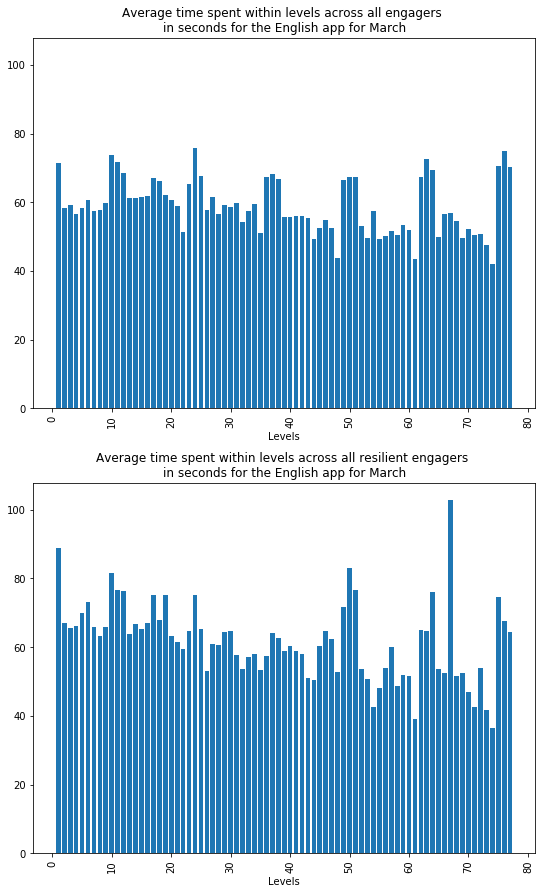

In [33]:
#evg time per level graphs
engagPerLevelEnglish = dict()
levelsEngagEnglish = dict()
for i in engagEnglish:
    for j in engagEnglish[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsEngagEnglish):
            levelsEngagEnglish[lvl] =0
            engagPerLevelEnglish[lvl] = 0
            for k in engagEnglish[i][j]:
                if(type(k)==int):
                    levelsEngagEnglish[lvl] = levelsEngagEnglish[lvl] + k
                    engagPerLevelEnglish[lvl] = engagPerLevelEnglish[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in engagEnglish[i][j]:
                if(type(k)==int):
                    levelsEngagEnglish[lvl] = levelsEngagEnglish[lvl] + k
                    engagPerLevelEnglish[lvl] = engagPerLevelEnglish[lvl] +1

levelsEngagEnglish = collections.OrderedDict(sorted(levelsEngagEnglish.items()))
engagPerLevelEnglish = collections.OrderedDict(sorted(engagPerLevelEnglish.items()))

avgEngagEnglish = dict()
for i in levelsEngagEnglish:
    avgEngagEnglish[i] = 0 
    avgEngagEnglish[i] = (levelsEngagEnglish[i]/engagPerLevelEnglish[i])

resEngagPerLevelEnglish = dict()
levelsResEngagEnglish = dict()
for i in resEngagEnglish:
    for j in resEngagEnglish[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsResEngagEnglish):
            levelsResEngagEnglish[lvl] =0
            resEngagPerLevelEnglish[lvl] = 0
            for k in resEngagEnglish[i][j]:
                if(type(k)==int):
                    levelsResEngagEnglish[lvl] = levelsResEngagEnglish[lvl] + k
                    resEngagPerLevelEnglish[lvl] = resEngagPerLevelEnglish[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in resEngagEnglish[i][j]:
                if(type(k)==int):
                    levelsResEngagEnglish[lvl] = levelsResEngagEnglish[lvl] + k
                    resEngagPerLevelEnglish[lvl] = resEngagPerLevelEnglish[lvl] +1

levelsResEngagEnglish = collections.OrderedDict(sorted(levelsResEngagEnglish.items()))
resEngagPerLevelEnglish = collections.OrderedDict(sorted(resEngagPerLevelEnglish.items()))

avgResEngagEnglish = dict()
for i in levelsResEngagEnglish:
    avgResEngagEnglish[i] = 0 
    avgResEngagEnglish[i] = (levelsResEngagEnglish[i]/resEngagPerLevelEnglish[i])



fig = plt.figure(figsize = (9,15))
ax1 = fig.add_subplot(211)

ax1.bar(avgEngagEnglish.keys(), avgEngagEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax1.set_title("Average time spent within levels across all engagers \nin seconds for the English app for March")
plt.xlabel("Levels")

ax2 = fig.add_subplot(212, sharey = ax1)
ax2.bar(avgResEngagEnglish.keys(), avgResEngagEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax2.set_title("Average time spent within levels across all resilient engagers \nin seconds for the English app for March")
plt.xlabel("Levels")
plt.show()

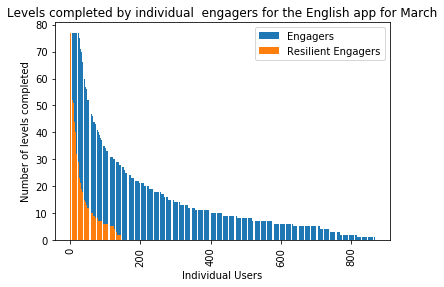

In [34]:
###levels completed graph

lcEngagEnglish = dict()
for i in engagEnglish:
    lcEngagEnglish[i] = len(engagEnglish[i])
lcEngagEnglish = sorted(lcEngagEnglish.items(), key=lambda kv: kv[1], reverse = True)
lcEngagEnglish =collections.OrderedDict(lcEngagEnglish)

lcResEngagEnglish = dict()
for i in resEngagEnglish:
    lcResEngagEnglish[i] = len(resEngagEnglish[i])
lcResEngagEnglish = sorted(lcResEngagEnglish.items(), key=lambda kv: kv[1], reverse = True)
lcResEngagEnglish =collections.OrderedDict(lcResEngagEnglish)


plt.bar(engagCountEnglish, lcEngagEnglish.values())
plt.bar(resEngagCountEnglish, lcResEngagEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Levels completed by individual  engagers for the English app for March")
plt.xlabel("Individual Users")
plt.ylabel("Number of levels completed")
plt.legend(['Engagers', 'Resilient Engagers'])
plt.show()

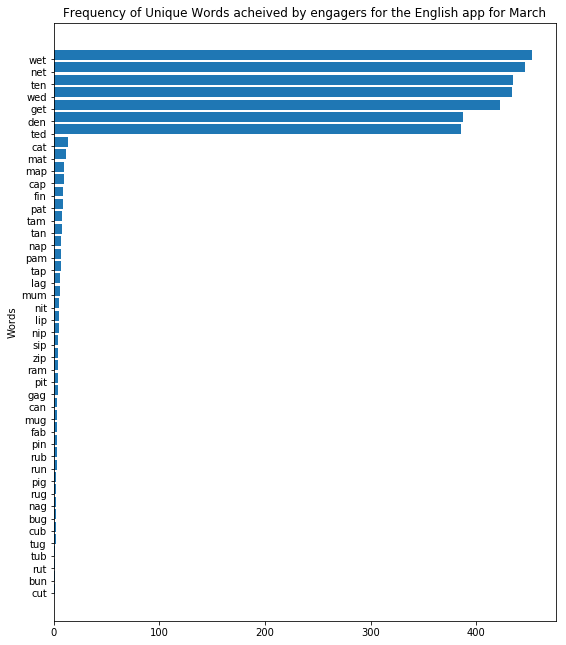

In [72]:
###frequency of engagers words

###creating a sub-dataset of csv data with only values from engagers
engagersMarchEnglish = english[english['ID'].isin(engagEnglish.keys())]

engagWordsEnglish = dict()
count = 0
user = engagersMarchEnglish.iloc[0][0]
while(count<len(engagersMarchEnglish)):
    user = engagersMarchEnglish.iloc[count][0]
    if(engagersMarchEnglish.iloc[count][2][:14]=='SegmentSuccess'):
        if(engagersMarchEnglish.iloc[count+1][2][0:11] == 'Puzzle Word' or engagersMarchEnglish.iloc[count+1][2][0:17] == 'Puzzle Sound Word'):
            if(user not in engagWordsEnglish):
                engagWordsEnglish[user] =[]
        
            word = engagersMarchEnglish.iloc[count+1][2].split(": ", 1)[1]
            if(word not in engagWordsEnglish[user]):
                engagWordsEnglish[user].append(word)
    count = count + 2

    

w=[]
for i in engagWordsEnglish:
    for j in engagWordsEnglish[i]:
        w.append(j)

from collections import Counter

counts = Counter(w)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))


bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.yticks(indexes + bar_width, labels)
plt.title("Frequency of Unique Words acheived by engagers for the English app for March")
plt.ylabel("Words")
plt.show()


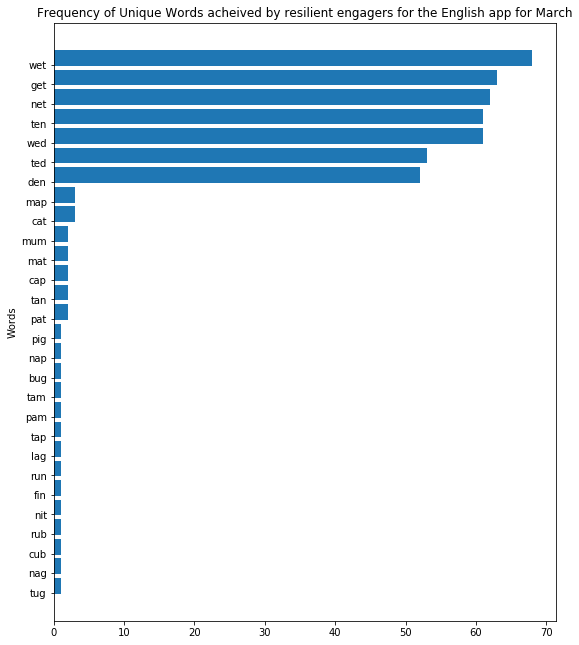

In [73]:
###frequency of resilient engagers words
resEngagWordsEnglish = dict()
count = 0
user = engagersMarchEnglish.iloc[0][0]
while(count<len(engagersMarchEnglish)):
    user = engagersMarchEnglish.iloc[count][0]
    if(user not in resEngagEnglish):
        pass
    else:
        if(engagersMarchEnglish.iloc[count][2][:14]=='SegmentSuccess'):
            if(engagersMarchEnglish.iloc[count+1][2][0:11] == 'Puzzle Word' or engagersMarchEnglish.iloc[count+1][2][0:17] == 'Puzzle Sound Word'):
                if(user not in resEngagWordsEnglish):
                    resEngagWordsEnglish[user] =[]
            
                word = engagersMarchEnglish.iloc[count+1][2].split(": ", 1)[1]
                if(word not in resEngagWordsEnglish[user]):
                    resEngagWordsEnglish[user].append(word)
    count = count + 2
    
w=[]
for i in resEngagWordsEnglish:
    for j in resEngagWordsEnglish[i]:
        w.append(j)

counts = Counter(w)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.yticks(indexes + bar_width, labels)
plt.title("Frequency of Unique Words acheived by resilient engagers for the English app for March")
plt.ylabel("Words")
plt.show()

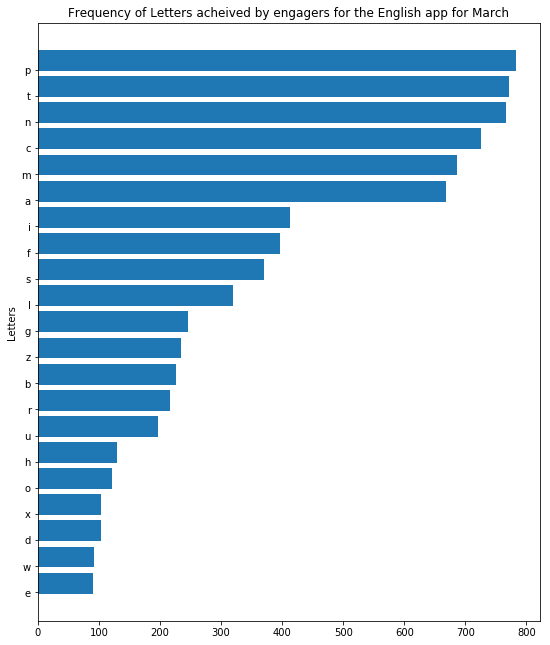

In [79]:
###frequency of engagers letters


engagLettersEnglish =dict()
count = 0
while(count<len(engagersMarchEnglish)):
    user = engagersMarchEnglish.iloc[count][0]
    if(engagersMarchEnglish.iloc[count][2][:14]=='SegmentSuccess'):
        if(engagersMarchEnglish.iloc[count+1][2][0:13] == 'Puzzle Letter' or engagersMarchEnglish.iloc[count+1][2][0:19] == 'Puzzle Sound Letter'):
            if(user not in engagLettersEnglish):
                    engagLettersEnglish[user] =[]
            
            letter = engagersMarchEnglish.iloc[count+1][2].split(": ", 1)[1]
            if(letter not in engagLettersEnglish[user]):
                engagLettersEnglish[user].append(letter)
    count = count + 2

l=[]
for i in engagLettersEnglish:
    for j in engagLettersEnglish[i]:
        if(len(j)==1 and not j=='('):
            l.append(j)

counts = Counter(l)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.yticks(indexes + bar_width, labels)
plt.title("Frequency of Letters acheived by engagers for the English app for March")
plt.ylabel("Letters")
plt.show()




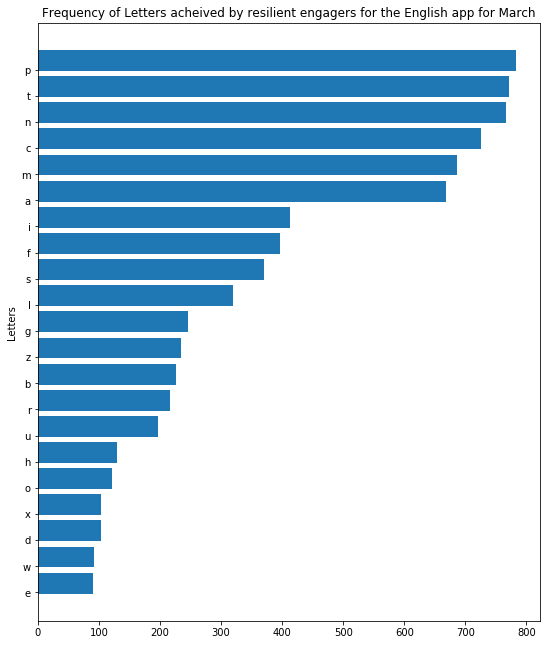

In [80]:

resEngagLettersEnglish  =dict()
count = 0
while(count<len(engagersMarchEnglish)):
    user = engagersMarchEnglish.iloc[count][0]
    if(user not in resEngagEnglish):
        pass
    else:
        if(engagersMarchEnglish.iloc[count][2][:14]=='SegmentSuccess'):
            if(engagersMarchEnglish.iloc[count+1][2][0:13] == 'Puzzle Letter' or engagersMarchEnglish.iloc[count+1][2][0:19] == 'Puzzle Sound Letter'):
                if(user not in resEngagLettersEnglish):
                    resEngagLettersEnglish[user] =[]
            
                letter = engagersMarchEnglish.iloc[count+1][2].split(": ", 1)[1]
                if(letter not in resEngagLettersEnglish[user]):
                    resEngagLettersEnglish[user].append(letter)
    count = count + 2

l=[]
for i in engagLettersEnglish:
    for j in engagLettersEnglish[i]:
        if(len(j)==1 and not j=='('):
            l.append(j)

counts = Counter(l)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.yticks(indexes + bar_width, labels)
plt.title("Frequency of Letters acheived by resilient engagers for the English app for March")
plt.ylabel("Letters")
plt.show()

In [40]:
############## English Learners Analysis

###resilient learners are learners who fail at least once before level 10 or spend twice the average time to reach level 10
resLearnEnglish = dict()
for i in learnEnglish:
    totTime = 0
    fail = False
    count = 0 
    
    for j in learnEnglish[i]:
        if(count<10):
            totTime += learnEnglish[i][j][0]
            if(learnEnglish[i][j][1] == 'Fail'):
                fail = True
        count += 1
        
    if(totTime>1200 or fail):
        resLearnEnglish[i] = copy.deepcopy(learnEnglish[i])

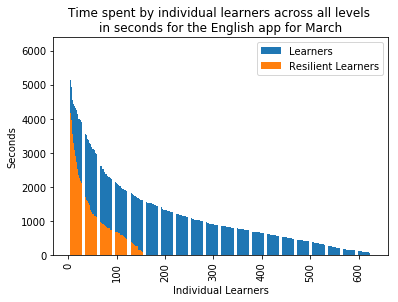

In [41]:
##total time per user graph
        
learnTimeEnglish = dict()
count = 1
for i in learnEnglish:
    learnTimeEnglish[count] = 0
    for j in learnEnglish[i]:
        for k in learnEnglish[i][j]:
            if(type(k)==int):
                    learnTimeEnglish[count] = learnTimeEnglish[count] + k
    count = count +1
    
sorted_learnTimeEnglish = sorted(learnTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
learnTimeEnglish = collections.OrderedDict(sorted_learnTimeEnglish)

learnCountEnglish = []
count = 0
while(count<len(learnEnglish)):
    learnCountEnglish.append(count+1)
    count = count+1
    
resLearnTimeEnglish = dict()
count = 1
for i in resLearnEnglish:
    resLearnTimeEnglish[count] = 0
    for j in resLearnEnglish[i]:
        for k in resLearnEnglish[i][j]:
            if(type(k)==int):
                    resLearnTimeEnglish[count] = resLearnTimeEnglish[count] + k
    count = count +1
    
sorted_resLearnTimeEnglish = sorted(resLearnTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
resLearnTimeEnglish = collections.OrderedDict(sorted_resLearnTimeEnglish)

resLearnCountEnglish = []
count = 0
while(count<len(resLearnEnglish)):
    resLearnCountEnglish.append(count+1)
    count = count+1

plt.bar(learnCountEnglish, learnTimeEnglish.values())
plt.bar(resLearnCountEnglish, resLearnTimeEnglish.values())
plt.title("Time spent by individual learners across all levels \nin seconds for the English app for March")
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel("Individual Learners")
plt.ylabel("Seconds")
plt.legend(['Learners', 'Resilient Learners'])
plt.show()

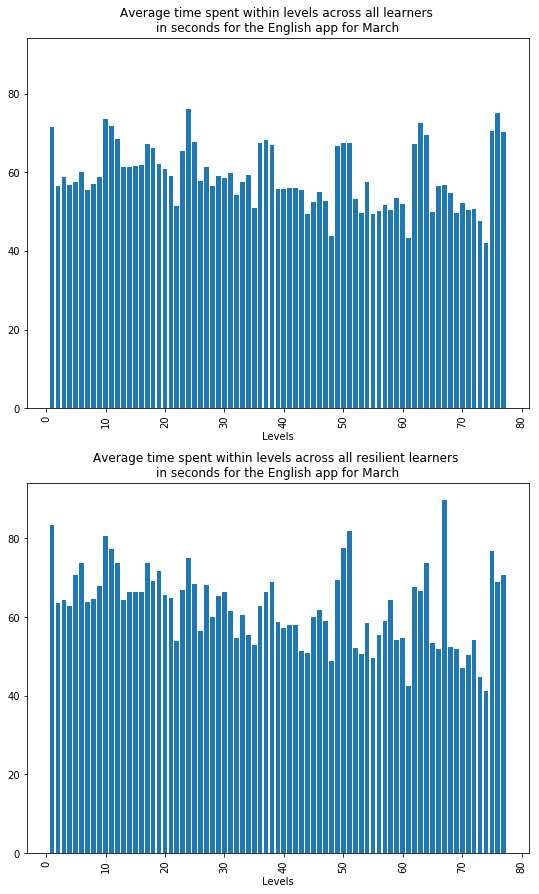

In [42]:
#evg time per level graphs
learnPerLevelEnglish = dict()
levelsLearnEnglish = dict()
for i in learnEnglish:
    for j in learnEnglish[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsLearnEnglish):
            levelsLearnEnglish[lvl] =0
            learnPerLevelEnglish[lvl] = 0
            for k in learnEnglish[i][j]:
                if(type(k)==int):
                    levelsLearnEnglish[lvl] = levelsLearnEnglish[lvl] + k
                    learnPerLevelEnglish[lvl] = learnPerLevelEnglish[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in learnEnglish[i][j]:
                if(type(k)==int):
                    levelsLearnEnglish[lvl] = levelsLearnEnglish[lvl] + k
                    learnPerLevelEnglish[lvl] = learnPerLevelEnglish[lvl] +1

levelsLearnEnglish = collections.OrderedDict(sorted(levelsLearnEnglish.items()))
learnPerLevelEnglish = collections.OrderedDict(sorted(learnPerLevelEnglish.items()))

avgLearnEnglish = dict()
for i in levelsLearnEnglish:
    avgLearnEnglish[i] = 0 
    avgLearnEnglish[i] = (levelsLearnEnglish[i]/learnPerLevelEnglish[i])

resLearnPerLevelEnglish = dict()
levelsResLearnEnglish = dict()
for i in resLearnEnglish:
    for j in resLearnEnglish[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsResLearnEnglish):
            levelsResLearnEnglish[lvl] =0
            resLearnPerLevelEnglish[lvl] = 0
            for k in resLearnEnglish[i][j]:
                if(type(k)==int):
                    levelsResLearnEnglish[lvl] = levelsResLearnEnglish[lvl] + k
                    resLearnPerLevelEnglish[lvl] = resLearnPerLevelEnglish[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in resLearnEnglish[i][j]:
                if(type(k)==int):
                    levelsResLearnEnglish[lvl] = levelsResLearnEnglish[lvl] + k
                    resLearnPerLevelEnglish[lvl] = resLearnPerLevelEnglish[lvl] +1

levelsResLearnEnglish = collections.OrderedDict(sorted(levelsResLearnEnglish.items()))
resLearnPerLevelEnglish = collections.OrderedDict(sorted(resLearnPerLevelEnglish.items()))

avgResLearnEnglish = dict()
for i in levelsResLearnEnglish:
    avgResLearnEnglish[i] = 0 
    avgResLearnEnglish[i] = (levelsResLearnEnglish[i]/resLearnPerLevelEnglish[i])



fig = plt.figure(figsize = (9,15))
ax1 = fig.add_subplot(211)

ax1.bar(avgLearnEnglish.keys(), avgLearnEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax1.set_title("Average time spent within levels across all learners \nin seconds for the English app for March")
plt.xlabel("Levels")

ax2 = fig.add_subplot(212, sharey = ax1)
ax2.bar(avgResLearnEnglish.keys(), avgResLearnEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax2.set_title("Average time spent within levels across all resilient learners \nin seconds for the English app for March")
plt.xlabel("Levels")
plt.show()

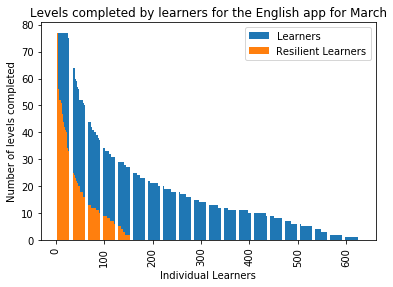

In [43]:
###levels completed

lcLearnEnglish = dict()
for i in learnEnglish:
    lcLearnEnglish[i] = len(learnEnglish[i])
lcLearnEnglish = sorted(lcLearnEnglish.items(), key=lambda kv: kv[1], reverse = True)
lcLearnEnglish =collections.OrderedDict(lcLearnEnglish)

lcResLearnEnglish = dict()
for i in resLearnEnglish:
    lcResLearnEnglish[i] = len(resLearnEnglish[i])
lcResLearnEnglish = sorted(lcResLearnEnglish.items(), key=lambda kv: kv[1], reverse = True)
lcResLearnEnglish =collections.OrderedDict(lcResLearnEnglish)


plt.bar(learnCountEnglish, lcLearnEnglish.values())
plt.bar(resLearnCountEnglish, lcResLearnEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Levels completed by learners for the English app for March")
plt.xlabel("Individual Learners")
plt.ylabel("Number of levels completed")
plt.legend(['Learners', 'Resilient Learners'])
plt.show()

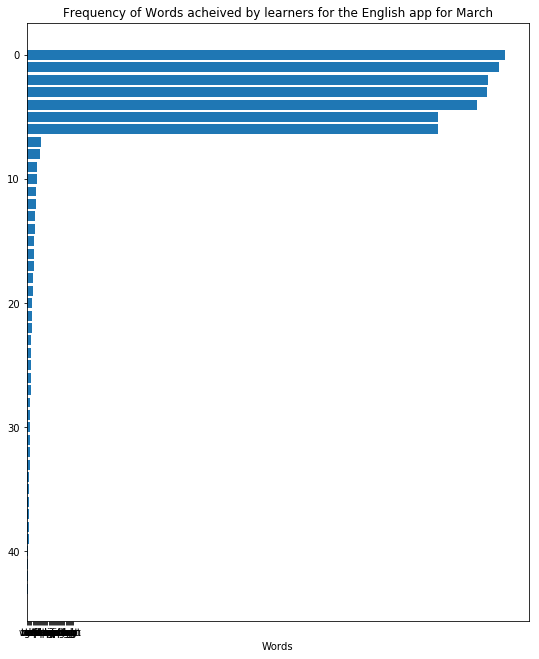

In [68]:
###frequency of learners words
###creating a sub-dataset of csv data with only values from learners
learnersMarchEnglish = english[english['ID'].isin(learnEnglish.keys())]

learnWordsEnglish = dict()
count = 0
user = learnersMarchEnglish.iloc[0][0]
while(count<len(learnersMarchEnglish)):
    user = learnersMarchEnglish.iloc[count][0]
    if(learnersMarchEnglish.iloc[count][2][:14]=='SegmentSuccess'):
        if(learnersMarchEnglish.iloc[count+1][2][0:11] == 'Puzzle Word' or learnersMarchEnglish.iloc[count+1][2][0:17] == 'Puzzle Sound Word'):
            if(user not in learnWordsEnglish):
                learnWordsEnglish[user] =[]
        
            word = learnersMarchEnglish.iloc[count+1][2].split(": ", 1)[1]
            if(word not in learnWordsEnglish[user]):
                learnWordsEnglish[user].append(word)
    count = count + 2

    

w=[]
for i in learnWordsEnglish:
    for j in learnWordsEnglish[i]:
        w.append(j)

from collections import Counter

counts = Counter(w)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.xticks(indexes + bar_width, labels)
plt.title("Frequency of Words acheived by learners for the English app for March")
plt.xlabel("Words")
plt.show()


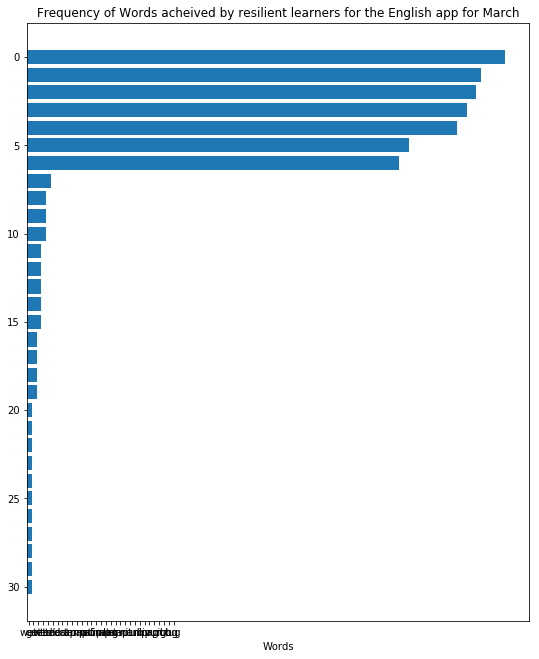

In [69]:
###frequency of resilient learners words
resLearnWordsEnglish = dict()
count = 0
user = learnersMarchEnglish.iloc[0][0]
while(count<len(learnersMarchEnglish)):
    user = learnersMarchEnglish.iloc[count][0]
    if(user not in resLearnEnglish):
        pass
    else:
        if(learnersMarchEnglish.iloc[count][2][:14]=='SegmentSuccess'):
            if(learnersMarchEnglish.iloc[count+1][2][0:11] == 'Puzzle Word' or learnersMarchEnglish.iloc[count+1][2][0:17] == 'Puzzle Sound Word'):
                if(user not in resLearnWordsEnglish):
                    resLearnWordsEnglish[user] =[]
            
                word = learnersMarchEnglish.iloc[count+1][2].split(": ", 1)[1]
                if(word not in resLearnWordsEnglish[user]):
                    resLearnWordsEnglish[user].append(word)
    count = count + 2
    
w=[]
for i in resLearnWordsEnglish:
    for j in resLearnWordsEnglish[i]:
        w.append(j)

counts = Counter(w)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.xticks(indexes + bar_width, labels)
plt.title("Frequency of Words acheived by resilient learners for the English app for March")
plt.xlabel("Words")
plt.show()

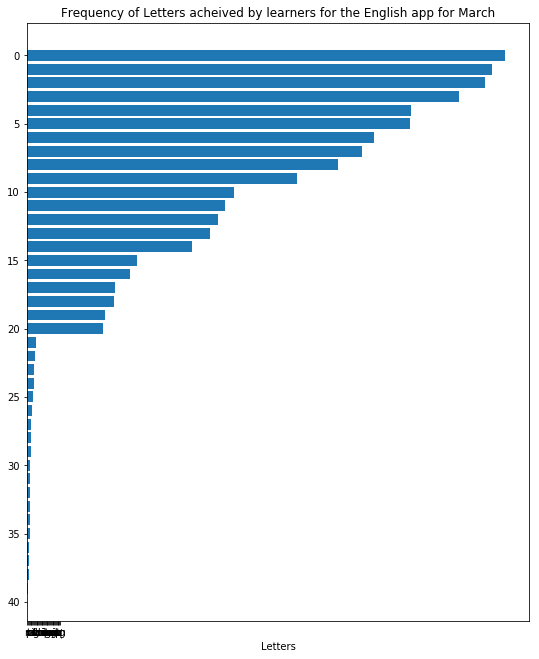

In [70]:
###frequency of learners letters

learnLettersEnglish =dict()
count = 0
while(count<len(learnersMarchEnglish)):
    user = learnersMarchEnglish.iloc[count][0]
    if(learnersMarchEnglish.iloc[count][2][:14]=='SegmentSuccess'):
        if(learnersMarchEnglish.iloc[count+1][2][0:13] == 'Puzzle Letter' or learnersMarchEnglish.iloc[count+1][2][0:19] == 'Puzzle Sound Letter'):
            if(user not in learnLettersEnglish):
                    learnLettersEnglish[user] =[]
            
            letter = learnersMarchEnglish.iloc[count+1][2].split(": ", 1)[1]
            if(letter not in learnLettersEnglish[user]):
                learnLettersEnglish[user].append(letter)
    count = count + 2

l=[]
for i in learnLettersEnglish:
    for j in learnLettersEnglish[i]:
        l.append(j)

counts = Counter(l)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.xticks(indexes + bar_width, labels)
plt.title("Frequency of Letters acheived by learners for the English app for March")
plt.xlabel("Letters")
plt.show()




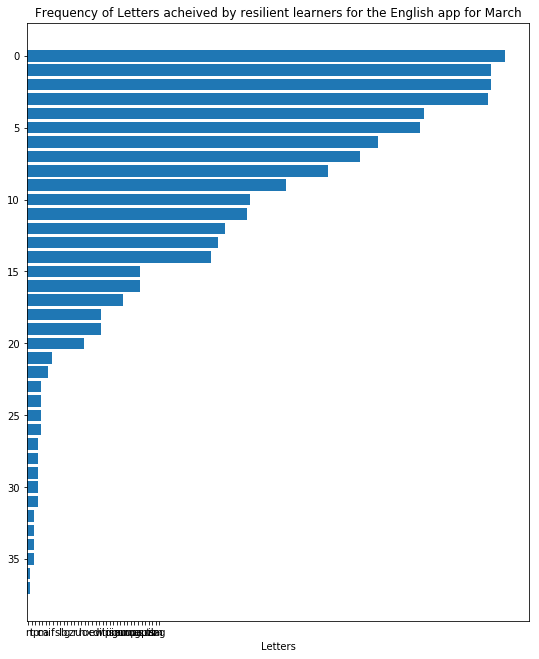

In [71]:
#####frequency of resilient learners letters
resLearnLettersEnglish  =dict()
count = 0
while(count<len(learnersMarchEnglish)):
    user = learnersMarchEnglish.iloc[count][0]
    if(user not in resLearnEnglish):
        pass
    else:
        if(learnersMarchEnglish.iloc[count][2][:14]=='SegmentSuccess'):
            if(learnersMarchEnglish.iloc[count+1][2][0:13] == 'Puzzle Letter' or learnersMarchEnglish.iloc[count+1][2][0:19] == 'Puzzle Sound Letter'):
                if(user not in resLearnLettersEnglish):
                    resLearnLettersEnglish[user] =[]
            
                letter = learnersMarchEnglish.iloc[count+1][2].split(": ", 1)[1]
                if(letter not in resLearnLettersEnglish[user]):
                    resLearnLettersEnglish[user].append(letter)
    count = count + 2

l=[]
for i in resLearnLettersEnglish:
    for j in resLearnLettersEnglish[i]:
        l.append(j)

counts = Counter(l)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
fig = plt.figure(1, figsize=(9, 11))
ax = fig.add_subplot(111)
ax.barh(indexes, values)
plt.gca().invert_yaxis()
plt.xticks(indexes + bar_width, labels)
plt.title("Frequency of Letters acheived by resilient learners for the English app for March")
plt.xlabel("Letters")
plt.show()


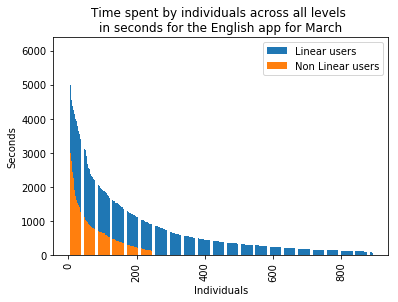

In [52]:
################linear vs non-linear user Analysis
linearTimeEnglish = dict()
count = 1
for i in linearEnglish:
    linearTimeEnglish[count] = 0
    for j in linearEnglish[i]:
        for k in linearEnglish[i][j]:
            if(type(k)==int):
                    linearTimeEnglish[count] = linearTimeEnglish[count] + k
    count = count +1
    
sorted_linearTimeEnglish = sorted(linearTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
linearTimeEnglish = collections.OrderedDict(sorted_linearTimeEnglish)

linearCountEnglish = []
count = 0
while(count<len(linearEnglish)):
    linearCountEnglish.append(count+1)
    count = count+1
    
nonLinearTimeEnglish = dict()
count = 1
for i in nonLinearEnglish:
    nonLinearTimeEnglish[count] = 0
    for j in nonLinearEnglish[i]:
        for k in nonLinearEnglish[i][j]:
            if(type(k)==int):
                    nonLinearTimeEnglish[count] = nonLinearTimeEnglish[count] + k
    count = count +1
    
sorted_nonLinearTimeEnglish = sorted(nonLinearTimeEnglish.items(), key=lambda kv: kv[1], reverse = True)
nonLinearTimeEnglish = collections.OrderedDict(sorted_nonLinearTimeEnglish)

nonLinearCountEnglish = []
count = 0
while(count<len(nonLinearEnglish)):
    nonLinearCountEnglish.append(count+1)
    count = count+1

plt.bar(linearCountEnglish, linearTimeEnglish.values())
plt.bar(nonLinearCountEnglish, nonLinearTimeEnglish.values())
plt.title("Time spent by individuals across all levels \nin seconds for the English app for March")
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel("Individuals")
plt.ylabel("Seconds")
plt.legend(['Linear users', 'Non Linear users'])
plt.show()


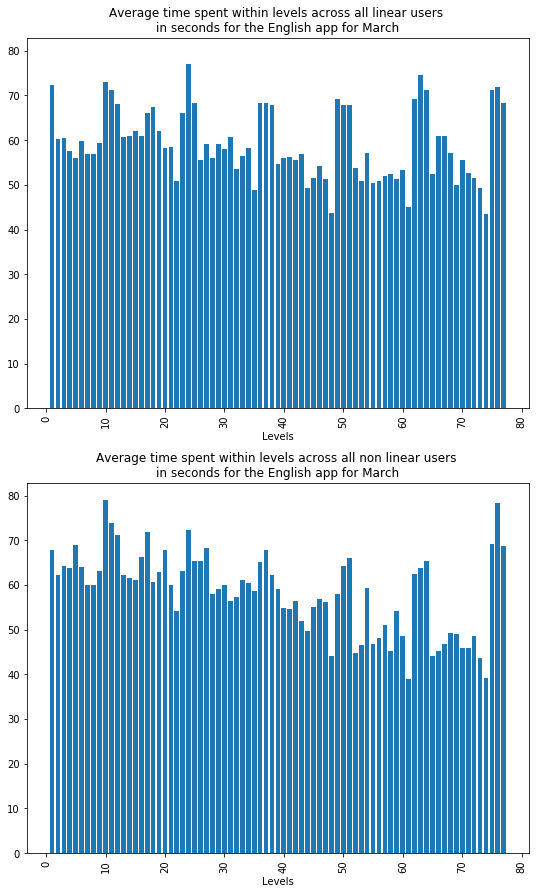

In [53]:
#evg time per level graphs
linearPerLevelEnglish = dict()
levelsLinearEnglish = dict()
for i in linearEnglish:
    for j in linearEnglish[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsLinearEnglish):
            levelsLinearEnglish[lvl] =0
            linearPerLevelEnglish[lvl] = 0
            for k in linearEnglish[i][j]:
                if(type(k)==int):
                    levelsLinearEnglish[lvl] = levelsLinearEnglish[lvl] + k
                    linearPerLevelEnglish[lvl] = linearPerLevelEnglish[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in linearEnglish[i][j]:
                if(type(k)==int):
                    levelsLinearEnglish[lvl] = levelsLinearEnglish[lvl] + k
                    linearPerLevelEnglish[lvl] = linearPerLevelEnglish[lvl] +1

levelsLinearEnglish = collections.OrderedDict(sorted(levelsLinearEnglish.items()))
linearPerLevelEnglish = collections.OrderedDict(sorted(linearPerLevelEnglish.items()))

avgLinearEnglish = dict()
for i in levelsLinearEnglish:
    avgLinearEnglish[i] = 0 
    avgLinearEnglish[i] = (levelsLinearEnglish[i]/linearPerLevelEnglish[i])

nonLinearPerLevelEnglish = dict()
levelsNonLinearEnglish = dict()
for i in nonLinearEnglish:
    for j in nonLinearEnglish[i]:
        lvl = int(j.split(" ",1)[1])
        if(lvl not in levelsNonLinearEnglish):
            levelsNonLinearEnglish[lvl] =0
            nonLinearPerLevelEnglish[lvl] = 0
            for k in nonLinearEnglish[i][j]:
                if(type(k)==int):
                    levelsNonLinearEnglish[lvl] = levelsNonLinearEnglish[lvl] + k
                    nonLinearPerLevelEnglish[lvl] = nonLinearPerLevelEnglish[lvl] +1
        else:           
            lvl = int(j.split(" ",1)[1])
            for k in nonLinearEnglish[i][j]:
                if(type(k)==int):
                    levelsNonLinearEnglish[lvl] = levelsNonLinearEnglish[lvl] + k
                    nonLinearPerLevelEnglish[lvl] = nonLinearPerLevelEnglish[lvl] +1

levelsNonLinearEnglish = collections.OrderedDict(sorted(levelsNonLinearEnglish.items()))
nonLinearPerLevelEnglish = collections.OrderedDict(sorted(nonLinearPerLevelEnglish.items()))

avgNonLinearEnglish = dict()
for i in levelsNonLinearEnglish:
    avgNonLinearEnglish[i] = 0 
    avgNonLinearEnglish[i] = (levelsNonLinearEnglish[i]/nonLinearPerLevelEnglish[i])



fig = plt.figure(figsize = (9,15))
ax1 = fig.add_subplot(211)

ax1.bar(avgLinearEnglish.keys(), avgLinearEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax1.set_title("Average time spent within levels across all linear users \nin seconds for the English app for March")
plt.xlabel("Levels")

ax2 = fig.add_subplot(212, sharey = ax1)
ax2.bar(avgNonLinearEnglish.keys(), avgNonLinearEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
ax2.set_title("Average time spent within levels across all non linear users \nin seconds for the English app for March")
plt.xlabel("Levels")
plt.show()

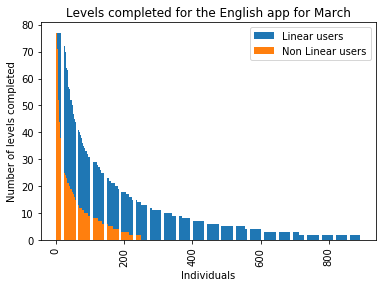

In [54]:
###levels completed

lcLinearEnglish = dict()
for i in linearEnglish:
    lcLinearEnglish[i] = len(linearEnglish[i])
lcLinearEnglish = sorted(lcLinearEnglish.items(), key=lambda kv: kv[1], reverse = True)
lcLinearEnglish =collections.OrderedDict(lcLinearEnglish)

lcNonLinearEnglish = dict()
for i in nonLinearEnglish:
    lcNonLinearEnglish[i] = len(nonLinearEnglish[i])
lcNonLinearEnglish = sorted(lcNonLinearEnglish.items(), key=lambda kv: kv[1], reverse = True)
lcNonLinearEnglish =collections.OrderedDict(lcNonLinearEnglish)


plt.bar(linearCountEnglish, lcLinearEnglish.values())
plt.bar(nonLinearCountEnglish, lcNonLinearEnglish.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Levels completed for the English app for March")
plt.xlabel("Individuals")
plt.ylabel("Number of levels completed")
plt.legend(['Linear users', 'Non Linear users'])
plt.show()

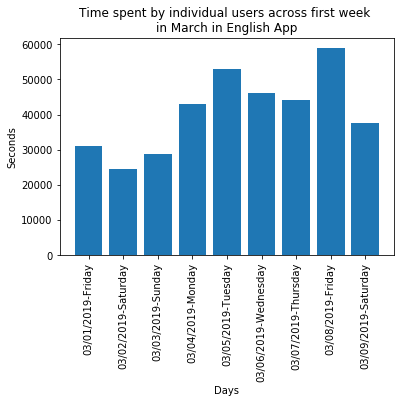

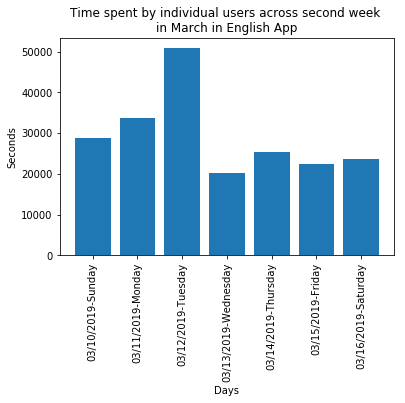

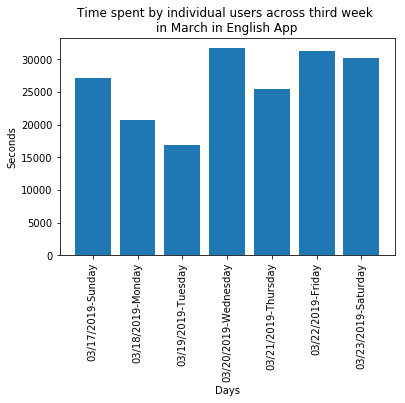

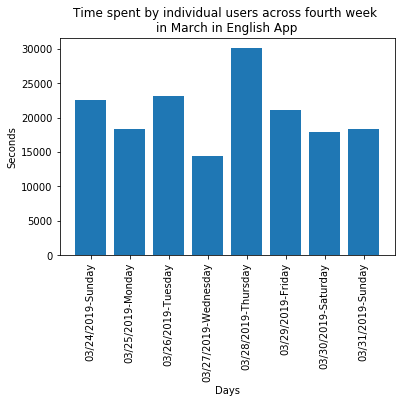

In [56]:
###weekly usage pattern 

week1 = dict()
week2 = dict()
week3 = dict()
week4 = dict()

week1range = ['03/01','03/02','03/03','03/04','03/05','03/06','03/07','03/08','03/09']
week2range = ['03/10','03/11','03/12','03/13','03/14','03/15','03/16']
week3range = ['03/17','03/18','03/19','03/20','03/21','03/22','03/23']
week4range = ['03/24','03/25','03/26','03/27','03/28','03/29','03/30','03/31']



for i in englishMarch:
    for j in englishMarch[i]:
        date = englishMarch[i][j][2]
        day = englishMarch[i][j][2][0:5]
        if(day in week1range):
            if(date not in week1):
                week1[date] = 0
                week1[date] = week1[date] + englishMarch[i][j][0]
            else:
                week1[date] = week1[date] + englishMarch[i][j][0]
        if(day in week2range):
            if(date not in week2):
                week2[date] = 0
                week2[date] = week2[date] + englishMarch[i][j][0]
            else:
                week2[date] = week2[date] + englishMarch[i][j][0]
        if(day in week3range):
            if(date not in week3):
                week3[date] = 0
                week3[date] = week3[date] + englishMarch[i][j][0]
            else:
                week3[date] = week3[date] + englishMarch[i][j][0]
        if(day in week4range):
            if(date not in week4):
                week4[date] = 0
                week4[date] = week4[date] + englishMarch[i][j][0]
            else:
                week4[date] = week4[date] + englishMarch[i][j][0]
                

week1 = collections.OrderedDict(sorted(week1.items()))
week2 = collections.OrderedDict(sorted(week2.items()))
week3 = collections.OrderedDict(sorted(week3.items()))
week4 = collections.OrderedDict(sorted(week4.items()))
                

plt.bar(week1.keys(), week1.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across first week \nin March in English App")
plt.xlabel("Days")
plt.ylabel("Seconds")
plt.show()

plt.bar(week2.keys(), week2.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across second week \nin March in English App")
plt.ylabel("Seconds")
plt.xlabel("Days")
plt.show()

plt.bar(week3.keys(), week3.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across third week \nin March in English App")
plt.ylabel("Seconds")
plt.xlabel("Days")
plt.show()

plt.bar(week4.keys(), week4.values())
plt.tick_params(axis='x', labelrotation=90)
plt.title("Time spent by individual users across fourth week \nin March in English App")
plt.xlabel("Days")
plt.ylabel("Seconds")
plt.show()


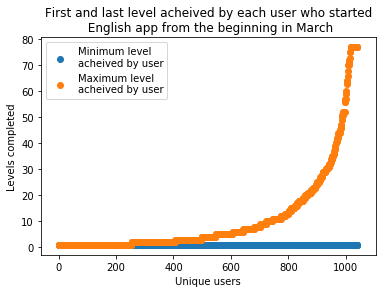

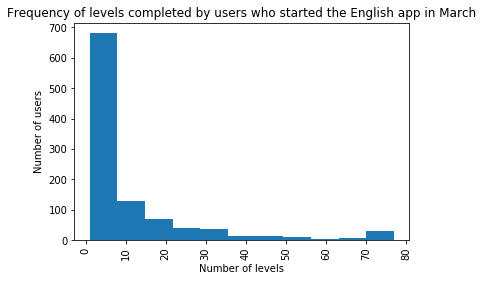

In [58]:
#graph of first and last level acheived by users

count = 1

firstLast = dict()

for i in englishMarch:
    firstLast[count] = []
    for j in englishMarch[i]:
        level = int(j.split(" ",1)[1])
        firstLast[count].append(level)
    
    for i in firstLast:
        firstLast[i].sort()
                
    count = count+1

#removes all levels completed that don't follow the user's linear path thru the levels
def sequentialList(mylist):
    mini = mylist[0]
    maxi = mylist[-1]
    l = list(range(mini, maxi+1))
    return(mylist==l)
    
count = 1
linear = dict()
for i in firstLast:
    cnt = 0
    if(len(firstLast[i])>0):
        if(firstLast[i][0] == 1 and sequentialList(firstLast[i])):
            linear[count] = []
            for j in firstLast[i]:
                linear[count].append(j)
            count=count+1

def sort_dict_by_value_len(d):
    sortedDict = dict()
    count=1
    for k in sorted(d, key=lambda k: len(d[k]), reverse=False):
        sortedDict[count] = d[k]
        count=count+1
    return sortedDict

linear=sort_dict_by_value_len(linear)



##gives mininum and maximum level acheived by users who completed levels in a linear path
                          
mini = dict()
maxi = dict()
for i in linear:
    if(linear[i]):
        mini[i]= 0
        maxi[i]= 0
        if(len(linear[i])>1):
            mini[i] = linear[i][0]
            maxi[i] = linear[i][-1]
        else:
            mini[i] = linear[i][0]
            maxi[i] = linear[i][0]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(mini.keys(), mini.values(), label = 'Minimum level \nacheived by user')
ax1.scatter(maxi.keys(), maxi.values(), label = 'Maximum level \nacheived by user')
plt.title("First and last level acheived by each user who started\n English app from the beginning in March")
plt.xlabel("Unique users")
plt.ylabel("Levels completed")
plt.legend(loc=2, prop={'size': 10})
plt.show()

##histogram of how many levels users who started the game in march completed
linearCount = []
for i in linear:
    linearCount.append(len(linear[i]))
    
plt.hist(linearCount, bins = 11)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Frequency of levels completed by users who started the English app in March")
plt.xlabel("Number of levels")
plt.ylabel("Number of users")
plt.show()

